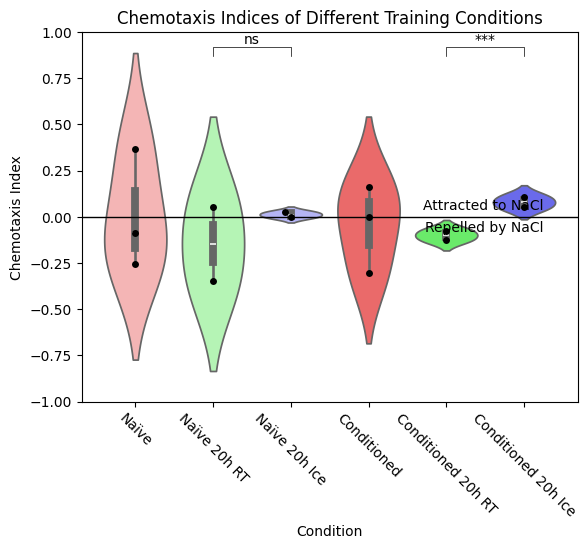

<Figure size 640x480 with 0 Axes>

In [13]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from matplotlib import pyplot as plt

# Loading data from an excel csv
df = pd.read_csv(r"C:\Users\lucas\OneDrive\Documents\Research Data.csv")

# Converting the pertinent columns of the dataframe to arrays
n_test = pd.array(df["Test"])
n_control = pd.array(df["Control"])
n_all = pd.array(df["All"])

# Calculating chemotaxis indices
chemotaxis_indices = np.divide(np.subtract(n_test, n_control), n_all)
df["CI"] = chemotaxis_indices
# Making empty arrays for sorting chemotaxis indices
n0 = []
n4 = []
ni = []
c0 = []
c4 = []
ci = []

# Iterating over the chemotaxis indices and assigning them to the right arrays
for i, index in enumerate(chemotaxis_indices):
    if i <= 2:
        n0.append(index)
    elif i <= 4:
        n4.append(index)
    elif i <= 6:
        ni.append(index)
    elif i <= 9:
        c0.append(index)
    elif i <= 11:
        c4.append(index)
    else:
        ci.append(index)

# Defining colors for the violin plots
colors = ("#FFAAAA", "#AAFFAA", "#AAAAFF", "#FF5555", "#55FF55", "#5555FF")

# Creating violin plots for chemotaxis indices with different colors
sns.violinplot(data=[n0, n4, ni, c0, c4, ci], palette=colors)
sns.swarmplot(data=[n0, n4, ni, c0, c4, ci], color="black")

x1, x2 = 4, 5
y, h, col = df['CI'].max() + 0.5, 0.05, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)

x1, x2 = 1, 2
y, h, col = df['CI'].max() + 0.5, 0.05, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

plt.xlabel("Condition")
plt.ylabel("Chemotaxis Index")
plt.title("Chemotaxis Indices of Different Training Conditions")
plt.xticks(ticks=np.arange(6), labels=['Naïve', 'Naïve 20h RT', 'Naïve 20h Ice', 'Conditioned', 'Conditioned 20h RT', 'Conditioned 20h Ice'], rotation = -45)  # Set x-axis labels
plt.axhline(y=0, color = "black", linewidth = 1)
plt.annotate(text="Attracted to NaCl", xy=(5.25,0.06), ha = "right", va = "center")
plt.annotate(text="Repelled by NaCl", xy=(5.25,-0.06), ha = "right", va = "center")
plt.ylim([-1,1])
plt.show()
plt.savefig("Chemotaxis Index Violin Plot.png", dpi=128)

Text(0.5, 1.0, 'Learning Indices of Different Training Conditions')

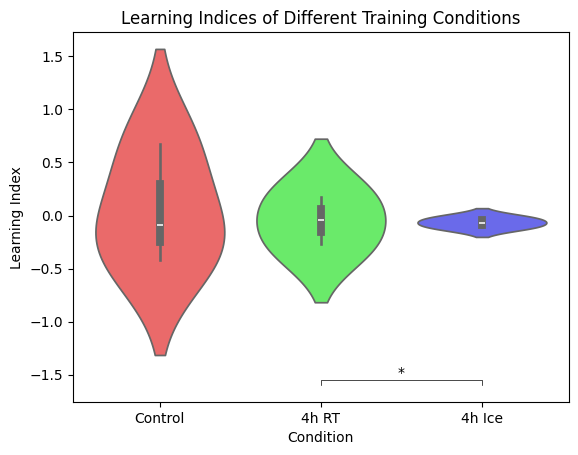

In [14]:
# Calculating learning indices
learn0 = np.subtract(n0, c0)
learn4 = np.subtract(n4, c4)
learni = np.subtract(ni, ci)

learning_indices = learn0[:2] + learn4 + learni

# Define colors for the violin plots
colors = ("#FF5555", "#55FF55", "#5555FF")

# Creating violin plots for learning indices with different colors
sns.violinplot(data=[learn0, learn4, learni], palette=colors)

x1, x2 = 1, 2
y, h, col = learning_indices.max() + -1.25, 0.05, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

plt.xlabel("Condition")
plt.ylabel("Learning Index")
plt.xticks(ticks=np.arange(3), labels=['Control', '4h RT', '4h Ice'], rotation = 0)  # Set x-axis labels
plt.title("Learning Indices of Different Training Conditions")

In [15]:
# Performing statistical tests
print(sp.stats.levene(n0, n4, ni, c0, c4, ci))
print(sp.stats.f_oneway(n0, n4, ni, c0, c4, ci))
print(sp.stats.tukey_hsd(n0, n4, ni, c0, c4, ci))

print(sp.stats.levene(learn0, learn4, learni))
print(sp.stats.f_oneway(learn0, learn4, learni))
print(sp.stats.tukey_hsd(learn0, learn4, learni))

LeveneResult(statistic=1.0289192396118134, pvalue=0.4612778487958521)
F_onewayResult(statistic=0.27567040033147266, pvalue=0.9139643337531134)
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.155     0.968    -0.593     0.903
 (0 - 2)     -0.004     1.000    -0.751     0.744
 (0 - 3)      0.056     0.999    -0.613     0.725
 (0 - 4)      0.108     0.993    -0.639     0.856
 (0 - 5)     -0.070     0.999    -0.818     0.678
 (1 - 0)     -0.155     0.968    -0.903     0.593
 (1 - 2)     -0.159     0.976    -0.978     0.661
 (1 - 3)     -0.099     0.996    -0.846     0.649
 (1 - 4)     -0.047     1.000    -0.866     0.772
 (1 - 5)     -0.225     0.905    -1.044     0.594
 (2 - 0)      0.004     1.000    -0.744     0.751
 (2 - 1)      0.159     0.976    -0.661     0.978
 (2 - 3)      0.060     1.000    -0.688     0.808
 (2 - 4)      0.112     0.995    -0.707     0.931
 (2 - 5)     -0.066     1.000    -0.885

In [16]:
data = [learn0, learn4, learni]
for condition in data:
    std = pd.array(condition).std(ddof=0)
    print(round(std,3))

print()

for condition in data:
    avg = pd.array(condition).mean()
    print(round(avg, 3))

0.456
0.223
0.039

0.056
-0.047
-0.066


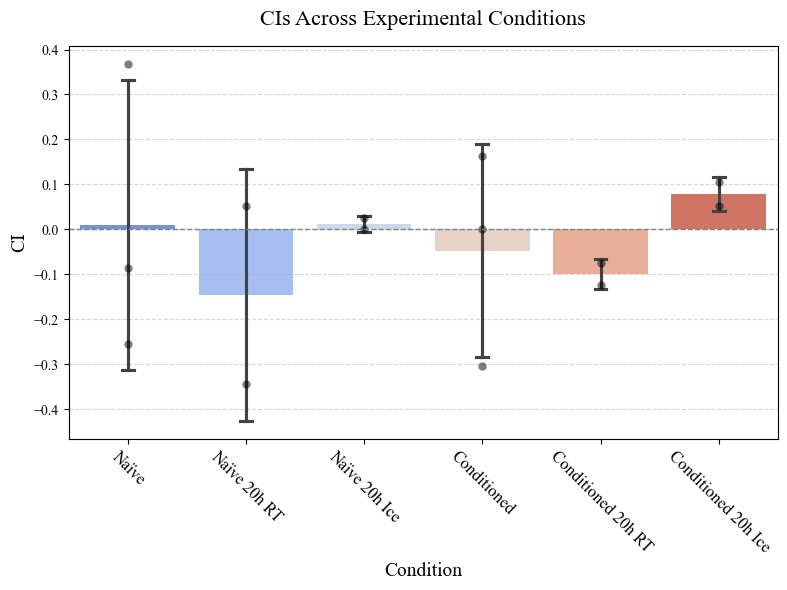

In [17]:
font = {'fontname':'Times New Roman'}
data = [n0, n4, ni, c0, c4, ci]

# Initialize the figure
plt.figure(figsize=(8, 6))
# Create the barplot with error bars
sns.barplot(
    data=data, 
    errorbar='sd',  # Add error bars showing standard deviation
    palette="coolwarm",  # Use a professional, consistent color palette
    zorder=1,
    capsize = 0.1
)

# Overlay individual data points for variability
sns.swarmplot(
    data=data, 
    color="black", 
    alpha=0.5,  # Make the data points semi-transparent
    size=6,  # Adjust the size of the points
    zorder=2
)

# Add title and axis labels
plt.title("CIs Across Experimental Conditions", fontsize=16, pad=15,
    **font)
plt.ylabel("CI", fontsize=14,
    **font)
plt.xlabel("Condition", fontsize=14,
    **font)

plt.yticks(
    **font)
# Customize the x-ticks
plt.xticks(
    ticks=np.arange(6), 
    labels=['Naïve', 'Naïve 20h RT', 'Naïve 20h Ice', 'Conditioned', 'Conditioned 20h RT', 'Conditioned 20h Ice'], 
    rotation=-45, 
    fontsize=12,
    **font
)

# Add a horizontal line at 0 for reference
plt.axhline(0, color="gray", linestyle="--", linewidth=1)

# Adjust the gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping

plt.savefig("Chemotaxis Indices Across Experimental Conditions", dpi=600, bbox_inches="tight")
plt.show()

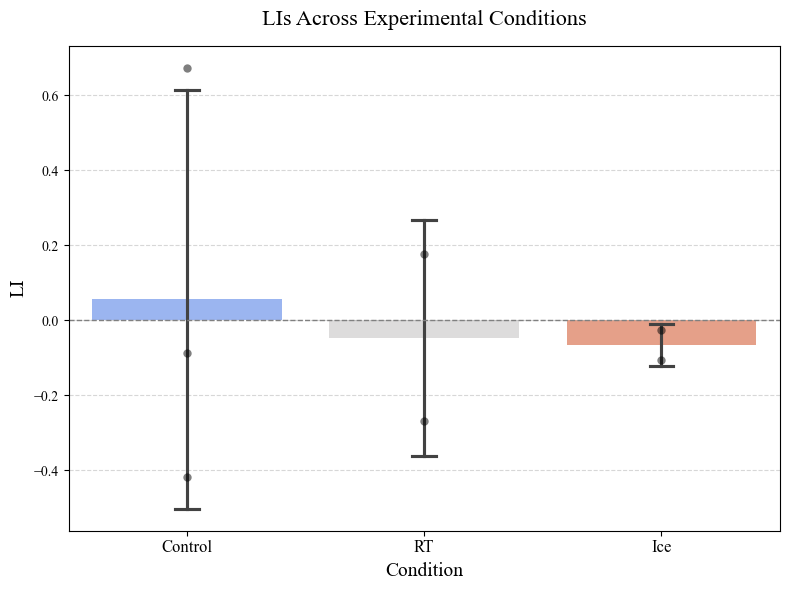

In [18]:
font = {'fontname':'Times New Roman'}
data = [learn0, learn4, learni]

# Initialize the figure
plt.figure(figsize=(8, 6))

# Create the barplot with error bars
sns.barplot(
    data=data,
    errorbar='sd',  # Add error bars showing standard deviation
    palette="coolwarm",  # Use a professional, consistent color palette
    zorder=1,
    capsize=0.1
)

# Overlay individual data points for variability
sns.swarmplot(
    data=data,
    color="black",
    alpha=0.5,  # Adjust transparency for clarity
    size=6,  # Adjust the size of the points
    zorder=2
)

# Add title and axis labels
plt.title("LIs Across Experimental Conditions", fontsize=16, pad=15, **font)
plt.ylabel("LI", fontsize=14, **font)
plt.xlabel("Condition", fontsize=14, **font)
plt.yticks(**font)

# Customize the x-ticks
plt.xticks(
    ticks=np.arange(3),
    labels=['Control', 'RT', 'Ice'],  # Provide labels for each group
    rotation=0,
    fontsize=12, **font
)

# Add a horizontal line at 0 for reference
plt.axhline(0, color="gray", linestyle="--", linewidth=1)

# Adjust the gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Save and show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig("Learning_Indices_Across_Experimental_Conditions.png", dpi=600, bbox_inches="tight")
plt.show()